In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

Basic equations for background star.

$\frac{1}{ρ} \frac{dp}{dr} = - \frac{dϕ}{dr}$

$4π G ρ = Δϕ$


We use following dimension-less quantities for background star (N=1 polytrope)

$ \hat{\rho} = \frac{\rho}{\rho_c}$

$x = \frac{r}{R}, 0≤x≤ 1$

$\hat{\phi} = \frac{ϕ}{4π G ρ R^2}$



$\hat{\rho} = \frac{\sin(π x)}{π x}$

Radial oscillations of a spherical star

$\frac{d}{dr}(Γ P \frac{1}{r^2}\frac{d}{dr}(r^2 ξ))- \frac{4}{r} \frac{dP}{dr}ξ + ω^2 ρ ξ = 0$

$⇒ \frac{d}{dr}(Γ P \frac{1}{r^2}\frac{d}{dr}(r^2 ξ))- \frac{4}{r} \frac{dP}{dr}ξ + ω^2 ρ ξ = 0$



In [4]:
#Background density
def rho(r): 
	rho = (np.sin(np.pi*r)) / (np.pi*r)
	return rho



In [5]:
x_min = 1.0e-2
x_max = 1.0
x = np.linspace(x_min, x_max, 100)

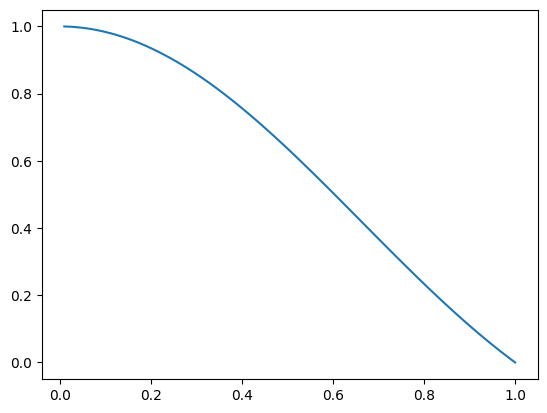

In [6]:
fig, ax = plt.subplots()
ax.plot(x,rho(x))

In [ ]:
#Adiabatic factor
Gamma = 2.2
Lambda1 = 3.2
Lambda2 = 4.2	
#The coupled ODEs
def eigenvalue_problem(r, y, om2):
	W = y[0]
	V = y[1]
	dWdr = (1/(cs(r)))*Phi + ((g(r)/cs(r)) - (2/r))*W + (((beta1**2)/r) - (((om2[0])*r)/(cs(r))))*V
	dVdr = ((g(r)/(cs(r)*(om2[0])*r)) + ((rhograd(r))/(rho(r)*(om2[0])*r)))*Phi + ((1/r) + ((Lambda2*g(r)*rhograd(r))/((om2[0])*r*rho(r))) + (((g(r)**2)*Lambda1)/(cs(r)*r*(om2[0]))) + ((rhograd(r)*csgrad(r))/(rho(r)*r*(om2[0]))) + ((cs(r)*(rhograd(r)**2))/((rho(r)**2)*(om2[0])*r)) + ((g(r)*csgrad(r))/(cs(r)*r*(om2[0]))))*W -  (((g(r))/(cs(r))) + (1/r) + (rhograd(r)/rho(r)))*V
	return np.vstack((dWdr, dVdr))
	
#boundary conditions
def bc(y0, yR, om2):
	R = 1.19e4
	return np.array([y0[2], om2[0]*yR[3]])

#initial solution guess
om2 = np.zeros(1)
y_guess = np.zeros((4, n_points))
om2[0] = 0.1
